In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
data = pd.read_csv('diabetic_data.csv')
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Display of the first few rows of the dataset to understand its structure
print(data.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [4]:
#To check the shape of data 
print(data.shape)

(101766, 50)


In [5]:
# Basic statistics of the dataset
print(data.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [6]:
# Checking for any missing values
print(data.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
# Get the shape of the Data before removing missing values
original_shape = data.shape

# Remove rows with missing values
data_without_missing = data.dropna()

# Get the shape of the Data after removing missing values
new_shape = data_without_missing.shape

# Compare shapes to see if rows are removed
if new_shape != original_shape:
    print("Rows with missing values were removed.")
else:
    print("No rows with missing values were removed.")


Rows with missing values were removed.


In [8]:
# Check the shape of the Data after removing missing values
print("Shape of Data after removing missing values:", data_without_missing.shape)

Shape of Data after removing missing values: (298, 50)


In [9]:
#To print the first few rows of the Data
print(data_without_missing.head())

     encounter_id  patient_nbr             race  gender      age weight  \
162       2521974     80499960        Caucasian    Male  [80-90)      ?   
192       2595612     89193870        Caucasian  Female  [40-50)      ?   
460       4084524     76959585  AfricanAmerican  Female  [70-80)      ?   
593       4804968    114960726        Caucasian  Female  [50-60)      ?   
696       5319174     87847776            Other    Male  [70-80)      ?   

     admission_type_id  discharge_disposition_id  admission_source_id  \
162                  6                         3                    7   
192                  6                         1                    7   
460                  6                         1                    7   
593                  6                         1                    7   
696                  6                         6                    7   

     time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
162                 5  ...          No 

In [10]:
# Checking for any missing values
print(data_without_missing.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [11]:
# Checking for any missing values
print(data_without_missing.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [13]:
# We will select the coloumns for our clustering 
x = data_without_missing[['number_inpatient', 'diabetesMed']]
x

,number_inpatient,diabetesMed
162,0,No
192,0,No
460,0,Yes
593,0,Yes
696,0,Yes
...,...,...
100386,6,Yes
100493,0,No
100578,2,No
101029,0,Yes


In [14]:
#Changeing the diabetesMed coloumn into numerical values 
# Define a dictionary to map 'yes' to 1.0 and 'no' to 0.0
mapping = {'Yes': 1.0, 'No': 0.0}

# Use the map function to apply the mapping to the column
x['diabetesMed'] = x['diabetesMed'].map(mapping)

# Checking the updated data
print(x.head())

     number_inpatient  diabetesMed
162                 0          0.0
192                 0          0.0
460                 0          1.0
593                 0          1.0
696                 0          1.0


C:\Users\Ryuk19.11.21\AppData\Local\Temp\ipykernel_21224\2087834154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['diabetesMed'] = x['diabetesMed'].map(mapping)


In [15]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
# Caluclating Within-Cluster Sum of Squares (wcss)
wcss = []
for i in range(2,11):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

In [17]:
print(wcss)

[227.2590299277607, 150.23280691586976, 101.82594417077178, 50.815762273901804, 37.40029325513197, 24.784663271080927, 19.13333333333334, 14.055555555555557, 8.222222222222225]


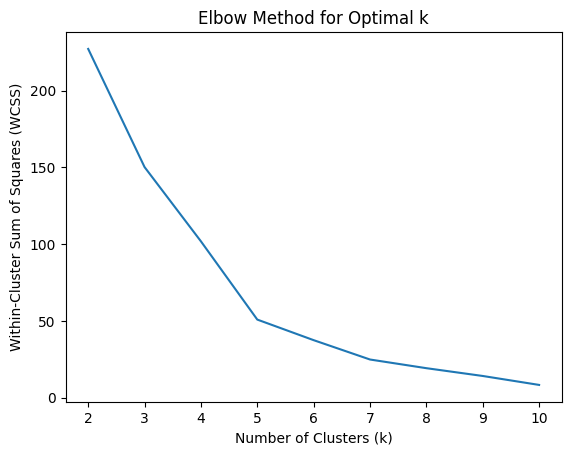

In [18]:
# we are plotting the wcss score in a Elbow graph
plt.plot(range(2, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [19]:
from sklearn.cluster import KMeans

# Performing K-means clustering
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=0)
#Fitting the kmeans in x
kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)